source : [programmers](https://github.com/learn-programmers/programmers_kdt_II/blob/main/ML_E2E.ipynb)

# [Programmers 과제] End-to-End 머신러닝 프로젝트
부동산 회사에 막 고용된 데이터 과학자라고 가정하고 예제 프로젝트를 처음부터 끝까지 (End-to-Enf) 진행하겠습니다. 주요 단계는 다음과 같습니다
1. 큰 그림을 봅니다 (look at the big picture).
2. 데이터를 구합니다 (get the data).
3. 데이터로부터 통찰을 얻기 위해 탐색하고 시각화합니다 (discover and visualize the data to gain insights).
4. 머신러닝 알고리즘을 위해 데이터를 준비합니다 (prepare the data for Machine Learning algorithms).
5. 모델을 선택하고 훈련시킵니다 (select a model and train it).
6. 모델을 상세하게 조정합니다 (fine-tune your model).
7. 솔루션을 제시합니다 (present your solution).
8. 시스템을 론칭하고 모니터링하고 유지 보수합니다 (launch, monitor, and maintain your system).

# 1. 큰 그림 보기 (Look at the Big Picture)
> 풀어야 할 문제: 캘리포니아 인구조사 데이터를 사용해 캘리포니아의 주택 가격 모델을 만드는 것

> 문제 정의
* 지도학습(supervised learning), 비지도학습(unsupervised learning), 
강화학습(reinforcement learning) 중에 어떤 경우에 해당하는가?
* 분류문제(classification)인가 아니면 회귀문제(regresssion)인가?
* 배치학습(batch learning), 온라인학습(online learning) 중 어떤 것을 사용해야 하는가?

> **성능측정지표(performance measure) 선택**
>> 평균제곱근 오차(root mean square error (RMSE))
$\mathrm{RMSE}(\mathbf{X}, h) = \sqrt{\frac{1}{m}\sum_{i=1}^{m}\left(h\left(\mathbf{x}^{(i)}\right)-y^{(i)}\right)^2}$
>> $m$: 데이터셋에 있는 샘플 수
>> $\mathbf{x}^{(i)}$: $i$번째 샘플의 전체 특성값의 벡터(vector)
>> $y^{(i)}$: $i$번째 샘플의 label(해당 샘플의 기대 출력값) \begin{align*} \mathbf{x}^{(1)} = \begin{bmatrix}
     -118.29 \\
     33.91 \\
     1,416 \\
     38,372
\end{bmatrix} \end{align*}
$$y^{(1)} = 156,400$$
>>$\mathbf{X}$: 데이터셋 모든 샘플의 모든 특성값(features)을 포함하는 행렬(matrix) \begin{align*} \mathbf{X} = \begin{bmatrix}
     \left(\mathbf{x}^{(1)}\right)^T \\
     \left(\mathbf{x}^{(2)}\right)^T \\
     \vdots \\
     \left(\mathbf{x}^{(2000)}\right)^T
     \end{bmatrix}
     = \begin{bmatrix}
     -188.29 & 33.91 & 1,416 & 38,372 \\
     \vdots & \vdots & \vdots & \vdots
     \end{bmatrix}
\end{align*}
>> $h$: 예측함수(prediction function). 하나의 샘플 $\mathbf{x}^{(i)}$에 대해 예측값 $\hat{y}^{(i)} = h\left(\mathbf{x}^{(i)}\right)$를 출력함.

>> $\mathrm{RMSE}(\mathbf{X}, h)$: 모델 $h$가 얼마나 좋은지 평가하는 지표, 또는 비용함수(cost function)

# 2. get the data 

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import requests

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


In [2]:
# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

import os
import tarfile
import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

fetch_housing_data를 호출하면 현재 작업공간에 datasets/housing 디렉토리를 만들고 housing.tgz 파일을 내려받고 압축을 풀어 housing.csv 파일을 만듭니다.

In [3]:
fetch_housing_data()

In [4]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [5]:
df = load_housing_data()

In [6]:
df.head(-1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20634,-121.56,39.27,28.0,2332.0,395.0,1041.0,344.0,3.7125,116800.0,INLAND
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND


#3. discover and visualize the data to gain insights

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Saving figure attribute_histogram_plots


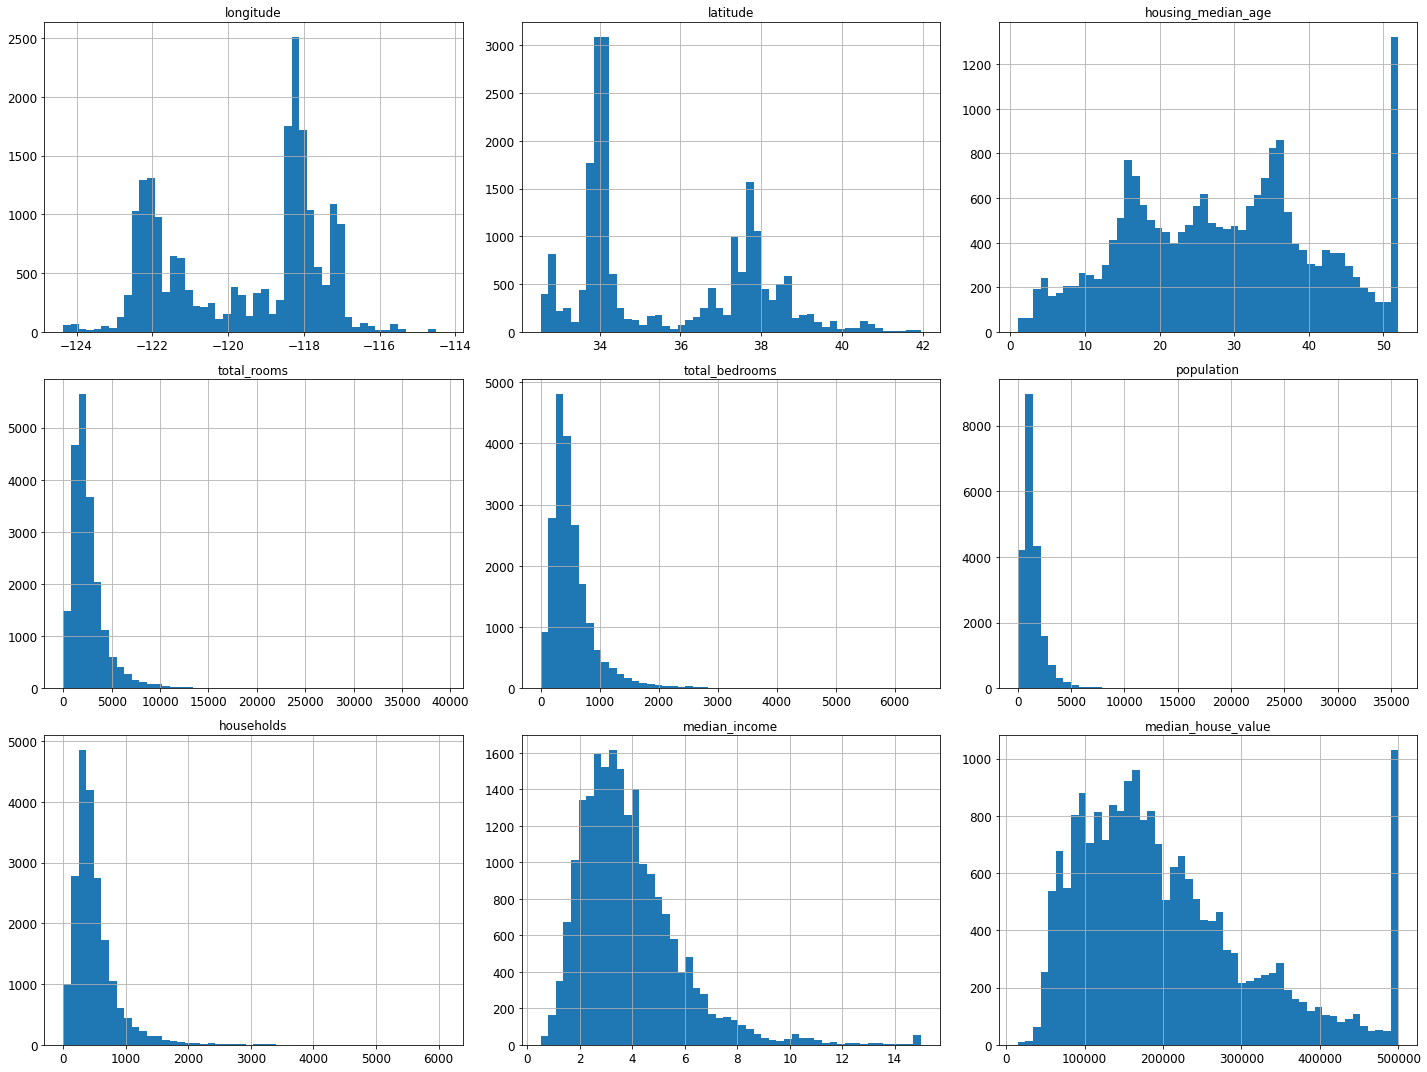

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

## 지리적 데이터 시각화


In [10]:
# 데이터 복사본 만들기 (훈련데이터를 손상시키지 않기 위해)
housing = df.copy()


Saving figure bad_visualization_plot


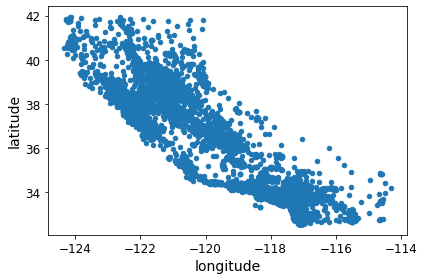

In [11]:
housing.plot(kind="scatter", x="longitude", y="latitude")
save_fig("bad_visualization_plot")

밀집된 영역 표시 with alpha옵션


Saving figure better_visualization_plot


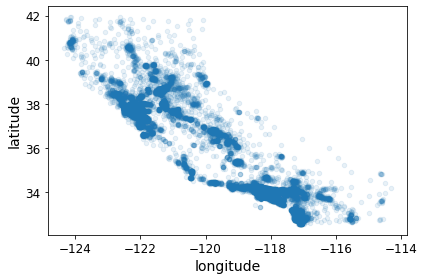

In [12]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
save_fig("better_visualization_plot")

더 다양한 정보 표시
* s: 원의 반지름 => 인구
* c: 색상 => 가격


Saving figure housing_prices_scatterplot


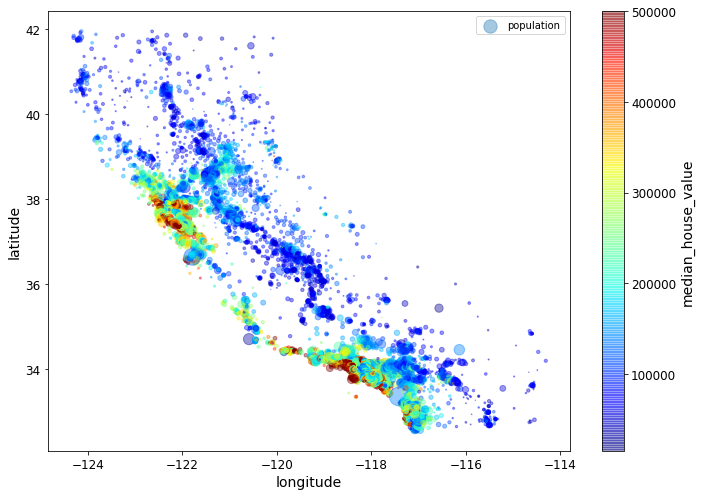

In [13]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()
save_fig("housing_prices_scatterplot")

In [14]:
# Download the California image
images_path = os.path.join(os.getcwd(), "images", "end_to_end_project")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "california.png"
save_fig('california')

Saving figure california


<Figure size 432x288 with 0 Axes>

Saving figure california_housing_prices_plot


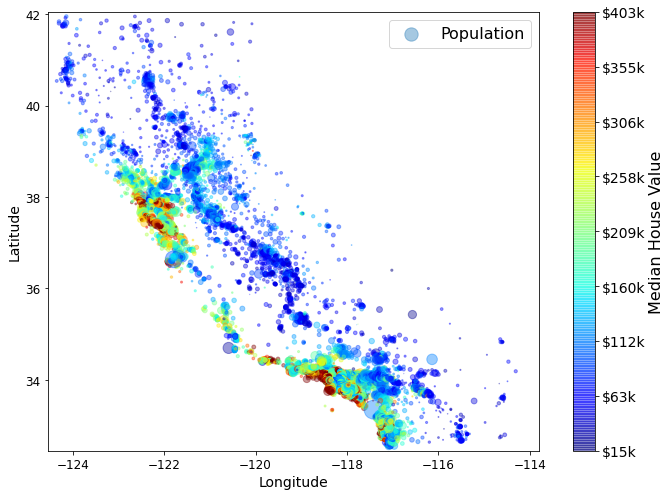

In [15]:
import matplotlib.image as mpimg
california_img=mpimg.imread(os.path.join(images_path, filename))
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=housing['population']/100, label="Population",
                       c="median_house_value", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                      )
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
save_fig("california_housing_prices_plot")
plt.show()

## 상관관계 관찰하기

In [16]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

### scatter_matrix 사용해서 상관관계 확인하기

Saving figure scatter_matrix_plot


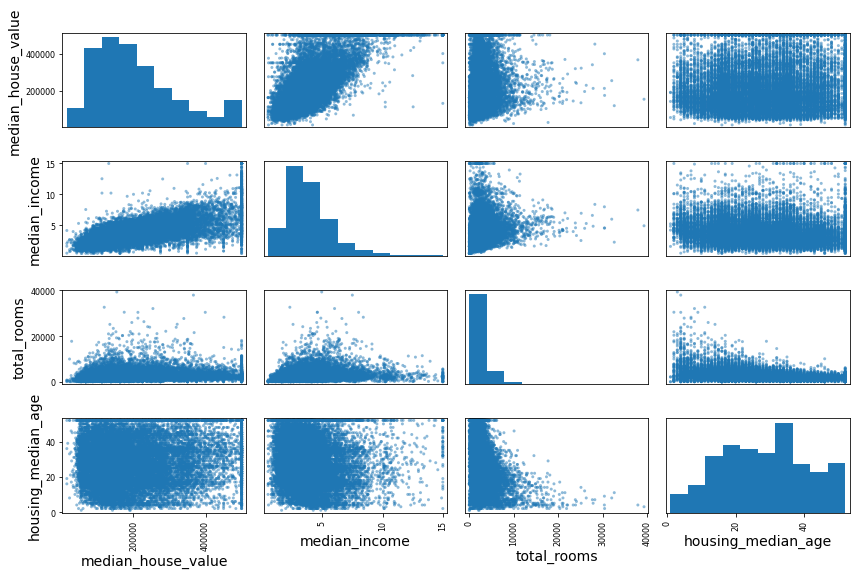

In [17]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

# 특성 몇 개만 살펴봄 
attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

Saving figure income_vs_house_value_scatterplot


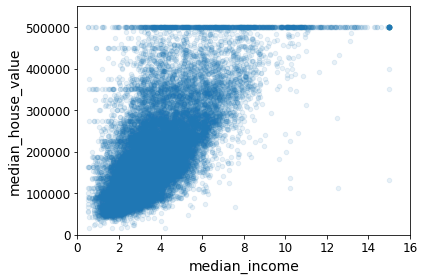

In [18]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])
save_fig("income_vs_house_value_scatterplot")

## 테스트 데이터셋 만들기
좋은 모델을 만들기 위해선 훈련에 사용되지 않고 모델평가만을 위해서 사용될 "테스트 데이터셋을 따로 구분하는 것이 필요합니다. 테스트 데이터셋을 별도로 생성할 수도 있지만 프로젝트 초기의 경우 하나의 데이터셋을 훈련, 테스트용으로 분리하는 것이 일반적입니다.

In [19]:
# to make this notebook's output identical at every run
np.random.seed(42)

import numpy as np

# For illustration only. Sklearn has train_test_split()
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [20]:
a = np.random.permutation(10)
a

array([8, 1, 5, 0, 7, 2, 9, 4, 3, 6])

In [21]:
train_set, test_set = split_train_test(df, 0.2)
len(train_set), len(test_set)

(16512, 4128)

* 위 방법은 문제점은? 반복할 때마다 달라짐
* 해결방안: 각 샘플의 식별자(identifier)를 사용해서 분할

In [22]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [23]:
df_with_id = df.reset_index()   # adds an `index` column
train_set, test_set = split_train_test_by_id(df_with_id, 0.2, "index")

* 위 방법의 문제점은? 데이터베이스 업데이트되면 행번호 바뀔 수 있음
* Id를 만드는 데 안전한 feature들을 사용해야 함

In [24]:
df_with_id["id"] = df["longitude"] * 1000 + df["latitude"]
train_set, test_set = split_train_test_by_id(df_with_id, 0.2, "id")

In [25]:
train_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,-122192.12
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,-122182.14
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-122202.15
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-122212.15
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-122212.15


In [26]:
test_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
59,59,-122.29,37.82,2.0,158.0,43.0,94.0,57.0,2.5625,60000.0,NEAR BAY,-122252.18
60,60,-122.29,37.83,52.0,1121.0,211.0,554.0,187.0,3.3929,75700.0,NEAR BAY,-122252.17
61,61,-122.29,37.82,49.0,135.0,29.0,86.0,23.0,6.1183,75000.0,NEAR BAY,-122252.18
62,62,-122.29,37.81,50.0,760.0,190.0,377.0,122.0,0.9011,86100.0,NEAR BAY,-122252.19
67,67,-122.29,37.80,52.0,1027.0,244.0,492.0,147.0,2.6094,81300.0,NEAR BAY,-122252.20


scikit-learn의 `train/test split`

 

In [27]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

**계층적 샘플링(stratified sampling)**

전체 데이터를 계층(strata)라는 동질의 그룹으로 나누고, 테스트 데이터가 전체 데이터를 잘 대표하도록 각 계층에서 올바른 수의 샘플을 추출

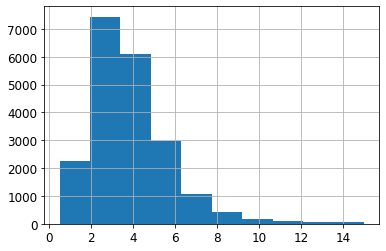

In [28]:
df["median_income"].hist()

In [29]:
df["income_cat"] = pd.cut(df["median_income"],
                        bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                        labels=[1, 2, 3, 4, 5])
df["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

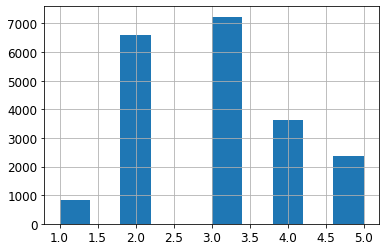

In [30]:
df["income_cat"].hist()

In [31]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["income_cat"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [32]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           16512 non-null  float64 
 1   latitude            16512 non-null  float64 
 2   housing_median_age  16512 non-null  float64 
 3   total_rooms         16512 non-null  float64 
 4   total_bedrooms      16354 non-null  float64 
 5   population          16512 non-null  float64 
 6   households          16512 non-null  float64 
 7   median_income       16512 non-null  float64 
 8   median_house_value  16512 non-null  float64 
 9   ocean_proximity     16512 non-null  object  
 10  income_cat          16512 non-null  category
dtypes: category(1), float64(9), object(1)
memory usage: 1.4+ MB


In [33]:
strat_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 5241 to 2398
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           4128 non-null   float64 
 1   latitude            4128 non-null   float64 
 2   housing_median_age  4128 non-null   float64 
 3   total_rooms         4128 non-null   float64 
 4   total_bedrooms      4079 non-null   float64 
 5   population          4128 non-null   float64 
 6   households          4128 non-null   float64 
 7   median_income       4128 non-null   float64 
 8   median_house_value  4128 non-null   float64 
 9   ocean_proximity     4128 non-null   object  
 10  income_cat          4128 non-null   category
dtypes: category(1), float64(9), object(1)
memory usage: 359.0+ KB


In [34]:
df["income_cat"].value_counts() / len(df)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [35]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [36]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(df),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.039729,0.040213,0.973236,-0.243309
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114583,0.109496,-4.318374,0.127011


## 특성 조합들 실험
여러 특성(feature, attribute)들의 조합으로 새로운 특성을 정의해볼 수 있음. ex)  가구당 방 개수, 침대방(bedroom)의 비율, 가구당 인원

In [37]:
housing = strat_train_set.copy()
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)


median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

데이터 탐색과정은 대부분 한 번으로 끝나지 않고 모델을 만들고 문제점을 분석한 뒤 다시 실행하게 됩니다.

# 4. prepare the data for Machine Learning algorithms

머신러닝 알고리즘을 위한 데이터 준비¶ 
> 데이터 준비는 데이터 변환(data transformation)과정으로 볼 수 있습니다.

> 데이터 수동변환 vs. 자동변환(함수만들기)
>> 데이터 자동변환의 장점들 
* 새로운 데이터에 대한 변환을 손쉽게 재생산(reproduce)할 수 있습니다.
* 향후에 재사용(reuse)할 수 있는 라이브러리를 구축하게 됩니다.
* 실제 시스템에서 가공되지 않은 데이터(raw data)를 알고리즘에 쉽게 입력으로 사용할 수 있도록 해줍니다.
* 여러 데이터 변환 방법을 쉽게 시도해 볼 수 있습니다.

In [38]:
housing = strat_train_set.drop("median_house_value", axis=1) # drop labels for training set
housing_labels = strat_train_set["median_house_value"].copy()

## 데이터 정제(Data Cleaning)
누락된 특성(missing features) 다루는 방법들
* 해당 구역을 제거(행을 제거)
* 해당 특성을 제거(열을 제거)
* 어떤 값으로 채움(0, 평균, 중간값 등)


In [39]:
housing.isnull().any(axis=1)

sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head() # True if there is a null feature
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
4629,-118.30,34.07,18.0,3759.0,NaN,3296.0,1462.0,2.2708,<1H OCEAN,2
6068,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,<1H OCEAN,4
17923,-121.97,37.35,30.0,1955.0,NaN,999.0,386.0,4.6328,<1H OCEAN,4
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,INLAND,2
19252,-122.79,38.48,7.0,6837.0,NaN,3468.0,1405.0,3.1662,<1H OCEAN,3


In [40]:
# sample_incomplete_rows.dropna(subset=["total_bedrooms"])    # option 1
# sample_incomplete_rows.drop("total_bedrooms", axis=1)       # option 2

In [41]:
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # option 3

median

433.0

In [42]:
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708,<1H OCEAN,2
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762,<1H OCEAN,4
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328,<1H OCEAN,4
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675,INLAND,2
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662,<1H OCEAN,3


## SimpleImputer 사용하기

In [43]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

# 중간값은 수치형 특성에서만 계산될 수 있기 때문에 텍스트 특성을 제외한 복사본을 생성
housing_num = housing.drop("ocean_proximity", axis=1)

imputer.fit(housing_num)
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409,    3.    ])

In [44]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [45]:
# 이제 학습된 imputer 객체를 사용해 누락된 값을 중간값으로 바꿀 수 있습니다.
X = imputer.transform(housing_num)

# 위 X는 NumPy array입니다. 이를 다시 pandas DataFrame으로 되돌릴 수 있습니다.
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing.index)

# 확인용 인덱스
sample_incomplete_rows.index.values


array([ 4629,  6068, 17923, 13656, 19252])

In [46]:
housing_num.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
4629,-118.30,34.07,18.0,3759.0,NaN,3296.0,1462.0,2.2708,2
6068,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,4
17923,-121.97,37.35,30.0,1955.0,NaN,999.0,386.0,4.6328,4
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,2
19252,-122.79,38.48,7.0,6837.0,NaN,3468.0,1405.0,3.1662,3


In [47]:
housing_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708,2.0
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762,4.0
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328,4.0
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675,2.0
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662,3.0


## Estimator, Transformer, Predictor
* **추정기(estimator)**: 데이터셋을 기반으로 모델 파라미터들을 추정하는 객체를 추정기라고 합니다(예를 들자면 imputer). 추정자체는 `fit()` method에 의해서 수행되고 하나의 데이터셋을 매개변수로 전달받습니다(지도학습의 경우 label을 담고 있는 데이터셋을 추가적인 매개변수로 전달).

* **변환기(transformer)**: (imputer같이) 데이터셋을 변환하는 추정기를 변환기라고 합니다. 변환은 `transform()` method가 수행합니다. 그리고 변환된 데이터셋을 반환합니다.

* **예측기(predictor)**: 일부 추정기는 주어진 새로운 데이터셋에 대해 예측값을 생성할 수 있습니다. 앞에서 사용했던 LinearRegression도 예측기입니다. 예측기의 `predict()` method는 새로운 데이터셋을 받아 예측값을 반환합니다. 그리고 `score(`) method는 예측값에 대한 평가지표를 반환합니다.

## 텍스트와 범주형 특성 다루기

In [48]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.value_counts()

ocean_proximity
<1H OCEAN          7276
INLAND             5263
NEAR OCEAN         2124
NEAR BAY           1847
ISLAND                2
dtype: int64

### OrdinalEncoder

In [49]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [50]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

그러나 "feature의 값이 비슷할수록 두 개의 샘플이 비슷하다"가 성립할 때 모델학습이 쉬워짐


### one-hot encoding

In [51]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [52]:
# 위 출력을 보면 일반적인 배열이 아니고 "sparse matrix"임을 알 수 있습니다.

housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [53]:
cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [54]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

## 나만의 변환기(Custom Transformers) 만들기
Scikit-Learn이 유용한 변환기를 많이 제공하지만 프로젝트를 위해 특별한 데이터 처리 작업을 해야 할 경우가 많습니다. 이 때 나만의 변환기를 만들 수 있습니다.
> 반드시 구현해야 할 method들
* fit()
* transform()

아래의 custom tranformer는 rooms_per_household, population_per_household 두 개의 새로운 특성을 데이터셋에 추가하며 add_bedrooms_per_room = True로 주어지면 bedrooms_per_room 특성까지 추가합니다. add_bedrooms_per_room은 하이퍼파라미터.

In [55]:
from sklearn.base import BaseEstimator, TransformerMixin

# columns index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self #nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room = False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [56]:
# Convert from numpy to dataframe

housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat,rooms_per_household,population_per_household
17606,-121.89,37.29,38,1568,351,710,339,2.7042,<1H OCEAN,2,4.62537,2.0944
18632,-121.93,37.05,14,679,108,306,113,6.4214,<1H OCEAN,5,6.00885,2.70796
14650,-117.2,32.77,31,1952,471,936,462,2.8621,NEAR OCEAN,2,4.22511,2.02597
3230,-119.61,36.31,25,1847,371,1460,353,1.8839,INLAND,2,5.23229,4.13598
3555,-118.59,34.23,17,6592,1525,4459,1463,3.0347,<1H OCEAN,3,4.50581,3.04785


## 특성 스케일링(Feature Scaling)
* Min-max scaling: 0과 1사이의 값이 되도록 조정
* 표준화(standardization): 평균이 0, 분산이 1이 되도록 만들어 줌(사이킷런의 StandardScaler사용)

## 변환 파이프라인(Transformation Pipelines)
여러 개의 변환이 순차적으로 이루어져야 할 경우 Pipeline class를 사용하면 편합니다.

* 이름, 추정기 쌍의 목록
* 마지막 단계를 제외하고 모두 변환기여야 합니다(`fit_transform()` method를 가지고 있어야 함).
* 파이프라인의 `fit()` method를 호출하면 모든 변환기의 `fit_transform()` method를 순서대로 호출하면서 한 단계의 출력을 다음 단계의 입력으로 전달합니다. 마지막 단계에서는 `fit()` method만 호출합니다.

In [57]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [58]:
housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

각 열(column) 마다 다른 파이프라인을 적용할 수도 있습니다! 예를 들어 수치형 특성들과 범주형 특성들에 대해 별도의 변환이 필요하다면 아래와 같이 `ColumnTransformer를` 사용하면 됩니다.

In [59]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [60]:
housing_prepared.shape, housing.shape

((16512, 17), (16512, 10))

# 5. select a model and train it

## Linear Regression

In [62]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
lin_reg.coef_

array([-54137.20708781, -55013.2872116 ,  14392.68343212,  -4044.59678427,
         8934.3560095 , -44845.68344469,  44884.77513654,  63514.86266688,
        14179.47426921,   6474.20838974,    994.94379601,  10585.71987677,
       -19784.87521119, -55494.63192495, 114626.55255433, -24057.75380645,
       -15289.29161173])

In [64]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(lin_reg.coef_, attributes), reverse=True)

[(114626.55255432762, 'ISLAND'),
 (63514.862666875255, 'median_income'),
 (44884.77513653603, 'households'),
 (14392.6834321173, 'housing_median_age'),
 (14179.474269208404, 'income_cat'),
 (10585.719876767136, 'bedrooms_per_room'),
 (8934.356009499832, 'total_bedrooms'),
 (6474.208389735353, 'rooms_per_hhold'),
 (994.9437960060355, 'pop_per_hhold'),
 (-4044.596784266787, 'total_rooms'),
 (-15289.291611731638, 'NEAR OCEAN'),
 (-19784.87521119328, '<1H OCEAN'),
 (-24057.753806449167, 'NEAR BAY'),
 (-44845.683444690556, 'population'),
 (-54137.20708780578, 'longitude'),
 (-55013.28721160489, 'latitude'),
 (-55494.631924953435, 'INLAND')]

In [65]:
# 전체 training dataset에 대한 트레이닝
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68376.64295459937

훈련 데이터셋의 RMSE가 이 경우처럼 큰 경우 => 과소적합(under-fitting)
> 과소적합이 일어나는 이유?
* 특성들(features)이 충분한 정보를 제공하지 못함
* 모델이 충분히 강력하지 못함

## DecisionTreeRegressor

In [66]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [67]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

## RandomForestRegressor

In [68]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [69]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18626.45217719628

## 모델 선택

* 테스트 데이터셋을 이용한 검증
* 훈련 데이터셋의 일부를 검증데이터(validation data)셋으로 분리해서 검증
* k-겹 교차 검증(k-fold cross-validation)

### cross-validation

In [70]:
from sklearn.model_selection import cross_val_score

# decision tree 
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [71]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [70274.7991723  67258.3624668  71350.42593227 68882.91340979
 70987.99296566 74177.52037059 70788.57311306 70850.53018019
 76430.62239321 70212.6471067 ]
Mean: 71121.4387110585
Standard deviation: 2434.3080046605132


In [72]:
# linear regression
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [66877.52325028 66608.120256   70575.91118868 74179.94799352
 67683.32205678 71103.16843468 64782.65896552 67711.29940352
 71080.40484136 67687.6384546 ]
Mean: 68828.99948449328
Standard deviation: 2662.7615706103393


In [73]:
# random Forest regressor
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [49633.454487   47565.18736589 50034.52343496 52444.25008076
 49463.18392461 53515.10766804 48577.59023701 47678.90315126
 53433.75372939 49947.64462367]
Mean: 50229.359870258486
Standard deviation: 2082.3174179664184


# 6. 모델 세부 튜닝(Fine-Tune Your Model)
모델의 종류를 선택한 후에 모델을 세부 튜닝하는 것이 필요합니다. 모델 학습을 위한 최적의 하이퍼파라미터를 찾는 과정이라고 말할 수 있습니다.


## 그리드 탐색(Grid Search)
수동으로 하이퍼파라미터 조합을 시도하는 대신 `GridSearchCV를` 사용하는 것이 좋습니다.

In [74]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [75]:
print('best params : ',grid_search.best_params_)
print('best estimator : ', grid_search.best_estimator_)

best params :  {'max_features': 6, 'n_estimators': 30}
best estimator :  RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=6, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)


In [76]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64246.880700613496 {'max_features': 2, 'n_estimators': 3}
55869.85367924813 {'max_features': 2, 'n_estimators': 10}
53472.1282558969 {'max_features': 2, 'n_estimators': 30}
61376.36445082522 {'max_features': 4, 'n_estimators': 3}
53846.329115303764 {'max_features': 4, 'n_estimators': 10}
51270.1941502407 {'max_features': 4, 'n_estimators': 30}
59860.61532587693 {'max_features': 6, 'n_estimators': 3}
53114.42460001889 {'max_features': 6, 'n_estimators': 10}
50811.43543872171 {'max_features': 6, 'n_estimators': 30}
59220.31563298743 {'max_features': 8, 'n_estimators': 3}
52884.78697544277 {'max_features': 8, 'n_estimators': 10}
50944.39369116168 {'max_features': 8, 'n_estimators': 30}
62805.52917192821 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54462.1410888642 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
61117.32056104296 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
53022.992252269294 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10

## 랜덤 탐색(Randomized Search)
하이퍼파라미터 조합의 수가 큰 경우에 유리. 지정한 횟수만큼만 평가.

In [77]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [78]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

49931.87687086762 {'max_features': 7, 'n_estimators': 180}
52122.359500383354 {'max_features': 5, 'n_estimators': 15}
51463.975706036916 {'max_features': 3, 'n_estimators': 72}
51381.480933769904 {'max_features': 5, 'n_estimators': 21}
50040.68374785571 {'max_features': 7, 'n_estimators': 122}
51436.83595589131 {'max_features': 3, 'n_estimators': 75}
51286.420458183085 {'max_features': 3, 'n_estimators': 88}
50312.65330988299 {'max_features': 5, 'n_estimators': 100}
50995.48957108733 {'max_features': 3, 'n_estimators': 150}
65455.451908645155 {'max_features': 5, 'n_estimators': 2}


## feature importance and error analysis

In [79]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([6.79326113e-02, 6.18280724e-02, 4.33395023e-02, 1.81017027e-02,
       1.83291556e-02, 1.93269892e-02, 1.78369580e-02, 2.41360490e-01,
       1.61976585e-01, 5.35982558e-02, 1.06273526e-01, 6.14045141e-02,
       1.22353255e-02, 1.08821239e-01, 2.76143239e-05, 2.59938294e-03,
       5.00807682e-03])

In [80]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
#cat_encoder = cat_pipeline.named_steps["cat_encoder"] # old solution
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.2413604895538288, 'median_income'),
 (0.16197658459849273, 'income_cat'),
 (0.10882123891274473, 'INLAND'),
 (0.10627352591969833, 'pop_per_hhold'),
 (0.06793261134305181, 'longitude'),
 (0.061828072419167844, 'latitude'),
 (0.06140451407841603, 'bedrooms_per_room'),
 (0.05359825584988401, 'rooms_per_hhold'),
 (0.04333950231438805, 'housing_median_age'),
 (0.0193269891794112, 'population'),
 (0.018329155582427953, 'total_bedrooms'),
 (0.018101702689683707, 'total_rooms'),
 (0.017836957990116878, 'households'),
 (0.01223532548334132, '<1H OCEAN'),
 (0.005008076816921073, 'NEAR OCEAN'),
 (0.0025993829445232247, 'NEAR BAY'),
 (2.761432390218492e-05, 'ISLAND')]

# 7. 솔루션을 제시합니다 (present your solution).
테스트 데이터셋으로 최종 평가하기

In [81]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [82]:
final_rmse

49040.18609727207

# 8. 시스템을 론칭하고 모니터링하고 유지 보수합니다 (launch, monitor, and maintain your system).

상용환경에 배포하기 위해서 데이터 전처리와 모델의 예측이 포함된 파이프라인을 만들어 저장하는 것이 좋습니다.

In [83]:
full_pipeline_with_predictor = Pipeline([
        ("preparation", full_pipeline),
        ("linear", LinearRegression())
    ])

full_pipeline_with_predictor.fit(housing, housing_labels)
# full_pipeline_with_predictor.predict(some_data)

Pipeline(memory=None,
         steps=[('preparation',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                              

In [84]:
my_model = full_pipeline_with_predictor

In [85]:
import joblib
joblib.dump(my_model, "my_model.pkl")
# ...
my_model_loaded = joblib.load("my_model.pkl")

In [86]:
my_model

Pipeline(memory=None,
         steps=[('preparation',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                              

## 론칭후 시스템 모니터링
* 시간이 지나면 모델이 낙후되면서 성능이 저하
> * 자동모니터링: 추천시스템의 경우, 추천된 상품의 판매량이 줄어드는지?
> * 수동모니터링: 이미지 분류의 경우, 분류된 이미지들 중 일부를 전문가에게 검토시킴

* 결과가 나빠진 경우
> * 데이터 입력의 품질이 나빠졌는지? 센서고장?
> * 트렌드의 변화? 계절적 요인?

* 유지보수
> * 정기적으로 새로운 데이터 수집(레이블)
> * 새로운 데이터를 테스트 데이터로, 현재의 테스트 데이터는 학습데이터로 편입
> * 다시 학습후, 새로운 테스트 데이터에 기반해 현재 모델과 새 모델을 평가, 비교

### 전체 프로세스에 고르게 시간을 배분해야 합니다!